In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

# Column Transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Exploratory Data Analysis

In [2]:
google= pd.read_csv("data/Google-Playstore.csv")
google

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
google['Free'].value_counts()

True     2267876
False      45068
Name: Free, dtype: int64

In [5]:
# dropping rating 0 since we do not know if it is actually rated 0 or if it is rated at all
google = google[google['Rating'] != 0.0]
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253182 entries, 1 to 2312943
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1253180 non-null  object 
 1   App Id             1253182 non-null  object 
 2   Category           1253182 non-null  object 
 3   Rating             1230299 non-null  float64
 4   Rating Count       1230299 non-null  float64
 5   Installs           1253075 non-null  object 
 6   Minimum Installs   1253075 non-null  float64
 7   Maximum Installs   1253182 non-null  int64  
 8   Free               1253182 non-null  bool   
 9   Price              1253182 non-null  float64
 10  Currency           1253054 non-null  object 
 11  Size               1252986 non-null  object 
 12  Minimum Android    1250683 non-null  object 
 13  Developer Id       1253167 non-null  object 
 14  Developer Website  873316 non-null   object 
 15  Developer Email    1253157 non-n

In [6]:
google['Rating'].value_counts()

5.0    100122
4.2     87993
4.4     86304
4.3     83276
4.6     78302
4.5     76753
4.1     69723
4.0     67342
4.7     62205
4.8     61109
3.9     55684
3.8     53863
4.9     44524
3.7     43300
3.6     35989
3.5     31636
3.4     28908
3.3     22613
3.2     21485
3.0     17275
3.1     15539
2.8     12235
2.9     11522
2.6      9213
2.7      9200
2.5      6942
2.4      6051
2.3      5414
2.2      4954
2.0      3804
2.1      3675
1.8      2957
1.9      2588
1.7      1928
1.6      1644
1.5      1157
1.4      1011
1.0       713
1.3       579
1.2       531
1.1       236
Name: Rating, dtype: int64

In [7]:
google = pd.DataFrame(google)

# Set display options to show all numbers without scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Display summary statistics
summary_stats = google.describe()
print(summary_stats)

              Rating     Rating Count   Minimum Installs   Maximum Installs  \
count 1230299.000000   1230299.000000     1253075.000000     1253182.000000   
mean        4.100915      5332.570199      338066.821648      590070.874151   
std         0.689101    289436.257332    20555939.125713    31998081.938886   
min         1.000000         5.000000           0.000000           0.000000   
25%         3.800000        12.000000        1000.000000        1184.000000   
50%         4.200000        35.000000        5000.000000        5397.000000   
75%         4.600000       178.000000       10000.000000       32394.000000   
max         5.000000 138557570.000000 10000000000.000000 12057627016.000000   

               Price  
count 1253182.000000  
mean        0.092616  
std         1.860907  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       399.990000  


In [8]:
google['Category'].value_counts()

Education                  129562
Tools                       87066
Entertainment               84273
Music & Audio               80500
Books & Reference           67274
Personalization             58009
Lifestyle                   55792
Business                    52119
Finance                     39755
Productivity                39211
Health & Fitness            34294
Shopping                    33317
Puzzle                      32838
Travel & Local              32365
Arcade                      31400
Casual                      30525
Sports                      27224
Social                      25933
News & Magazines            25729
Communication               25277
Food & Drink                23372
Photography                 23011
Simulation                  19688
Action                      18841
Adventure                   16149
Maps & Navigation           15409
Medical                     14810
Educational                 12660
Video Players & Editors     10683
Auto & Vehicle

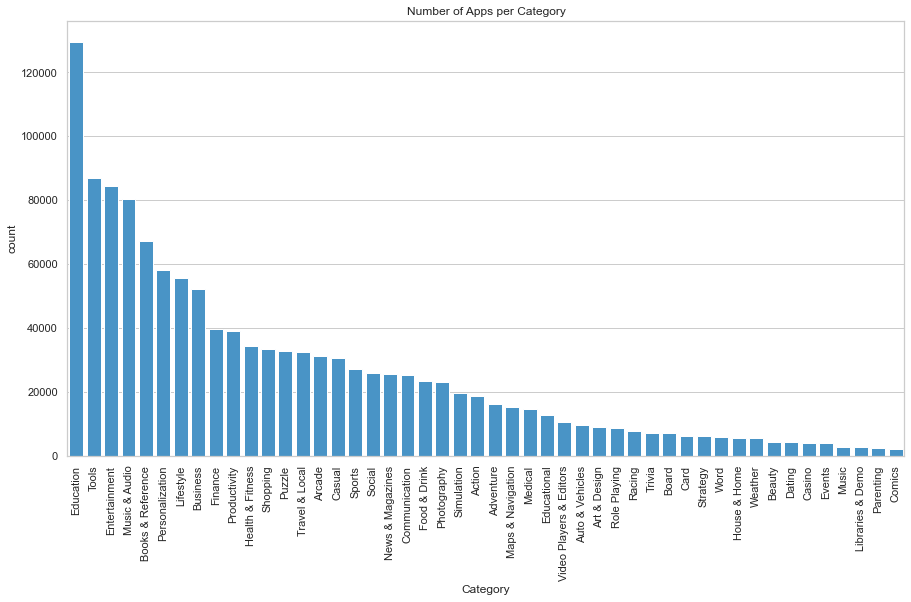

In [9]:
# Set the color to a specific shade of blue
blue_color = '#3498db'  # You can replace this with your desired blue color code

# Plotting the countplot with the specified blue color
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")
sns.countplot(x='Category', data=google, order=google['Category'].value_counts().index, color=blue_color)
plt.xticks(rotation=90)
plt.title('Number of Apps per Category')
plt.show()


In [10]:
print('Average Rating per Category')
google.groupby('Category')['Rating'].agg(['mean','median'])

Average Rating per Category


,mean,median
Category,,
Action,4.007801,4.000000
Adventure,4.077112,4.100000
Arcade,4.260515,4.300000
Art & Design,3.979133,4.100000
Auto & Vehicles,3.890104,4.000000
Beauty,4.059424,4.200000
Board,4.068230,4.100000
Books & Reference,4.287158,4.400000
Business,4.050910,4.200000


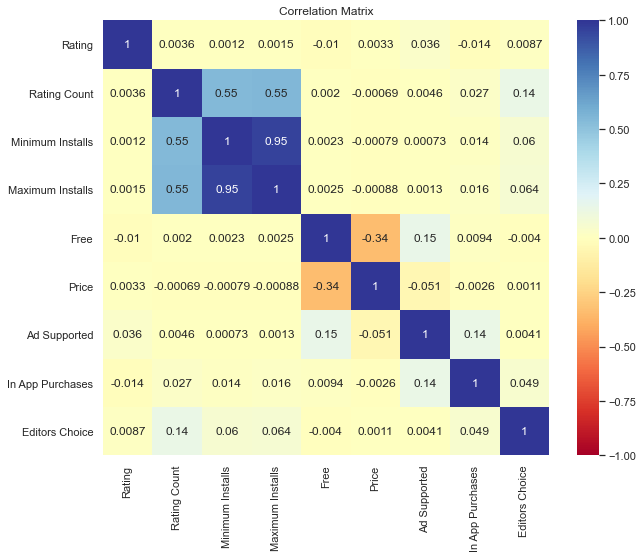

In [11]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(google.corr(), vmin=-1, cmap='RdYlBu', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
google.nunique()

App Name             1192519
App Id               1253182
Category                  48
Rating                    41
Rating Count           38481
Installs                  22
Minimum Installs          22
Maximum Installs      250093
Free                       2
Price                    736
Currency                  12
Size                    1622
Minimum Android          135
Developer Id          498071
Developer Website     488511
Developer Email       589891
Released                4157
Last Updated            3888
Content Rating             6
Privacy Policy        585497
Ad Supported               2
In App Purchases           2
Editors Choice             2
Scraped Time           67348
dtype: int64

In [13]:
google['Free'].value_counts(normalize=True)

True    0.979433
False   0.020567
Name: Free, dtype: float64

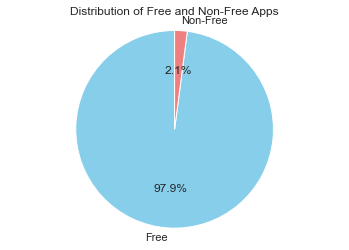

In [14]:

free_counts = google['Free'].value_counts()

# Data for the pie chart
labels = ['Free', 'Non-Free']
sizes = [free_counts[True], free_counts[False]]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Free and Non-Free Apps')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

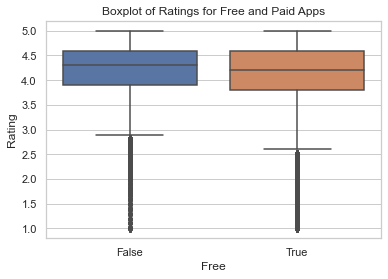

In [61]:
sns.boxplot(x="Free", y="Rating", data=google)

# Set the title for the plot
plt.title("Boxplot of Ratings for Free and Paid Apps")

# Display the plot
plt.show()

The average rating of paid apps is slightly higher

In [15]:
google['Editors Choice'].value_counts(normalize=True)

False   0.999319
True    0.000681
Name: Editors Choice, dtype: float64

Text(0.5, 1.0, 'Content rating with their counts')

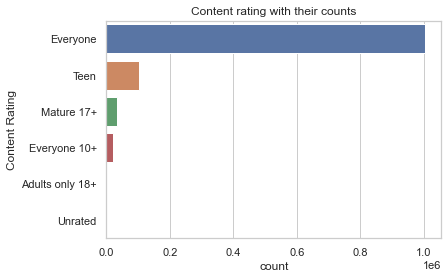

In [58]:
sns.countplot(y = "Content Rating", data = df)
plt.title("Content rating with their counts")

# Handling Missing Values

In [16]:
google.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                128
Size                    196
Minimum Android        2499
Developer Id             15
Developer Website    379866
Developer Email          25
Released              49617
Last Updated              0
Content Rating            0
Privacy Policy       211040
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [17]:
google['Ad Supported'].value_counts()

True     712139
False    541043
Name: Ad Supported, dtype: int64

In [18]:
google['Released'].value_counts().sort_index()

Apr 1, 2010      9
Apr 1, 2011     33
Apr 1, 2012     40
Apr 1, 2013     85
Apr 1, 2014    193
              ... 
Sep 9, 2016    345
Sep 9, 2017    307
Sep 9, 2018    363
Sep 9, 2019    674
Sep 9, 2020    682
Name: Released, Length: 4157, dtype: int64

In [20]:
# Assuming your DataFrame is named 'google'
# Create a copy of the DataFrame with the specified columns dropped
df = google.drop(['Developer Website', 'Privacy Policy'], axis=1)

# Check missing values in the modified DataFrame
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253182 entries, 1 to 2312943
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1253180 non-null  object 
 1   App Id            1253182 non-null  object 
 2   Category          1253182 non-null  object 
 3   Rating            1230299 non-null  float64
 4   Rating Count      1230299 non-null  float64
 5   Installs          1253075 non-null  object 
 6   Minimum Installs  1253075 non-null  float64
 7   Maximum Installs  1253182 non-null  int64  
 8   Free              1253182 non-null  bool   
 9   Price             1253182 non-null  float64
 10  Currency          1253054 non-null  object 
 11  Size              1252986 non-null  object 
 12  Minimum Android   1250683 non-null  object 
 13  Developer Id      1253167 non-null  object 
 14  Developer Email   1253157 non-null  object 
 15  Released          1203565 non-null  object 
 16  

In [21]:
df['Size'].value_counts()

Varies with device    61286
11M                   32765
12M                   29426
13M                   25969
14M                   24170
                      ...  
1,020M                    1
810M                      1
6.9k                      1
681M                      1
3.4k                      1
Name: Size, Length: 1622, dtype: int64

In [22]:
df.isna().sum()

App Name                2
App Id                  0
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Currency              128
Size                  196
Minimum Android      2499
Developer Id           15
Developer Email        25
Released            49617
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

In [27]:
# Drop missing values from the DataFrame 'df'
df.dropna(inplace=True)

# Display the shape of the DataFrame after dropping missing values
print("Shape of the DataFrame after dropping missing values:", df.shape)

Shape of the DataFrame after dropping missing values: (1200878, 22)


# Handling Duplicates

In [28]:
# Assuming 'df' is your DataFrame
duplicates = df[df.duplicated()]

# Display the duplicates
print("Duplicate Rows except first occurrence:")
print(duplicates)

Duplicate Rows except first occurrence:
Empty DataFrame
Columns: [App Name, App Id, Category, Rating, Rating Count, Installs, Minimum Installs, Maximum Installs, Free, Price, Currency, Size, Minimum Android, Developer Id, Developer Email, Released, Last Updated, Content Rating, Ad Supported, In App Purchases, Editors Choice, Scraped Time]
Index: []

[0 rows x 22 columns]


In [29]:
df["Installs"].value_counts()

1,000+             318069
10,000+            241552
5,000+             132853
100+               118829
100,000+           105478
500+                97861
50,000+             71561
1,000,000+          32419
500,000+            26015
50+                 23358
10+                 18424
5,000,000+           6354
10,000,000+          5970
50,000,000+           796
100,000,000+          501
5+                    489
0+                    141
1+                     82
500,000,000+           61
1,000,000,000+         53
5,000,000,000+         11
10,000,000,000+         1
Name: Installs, dtype: int64

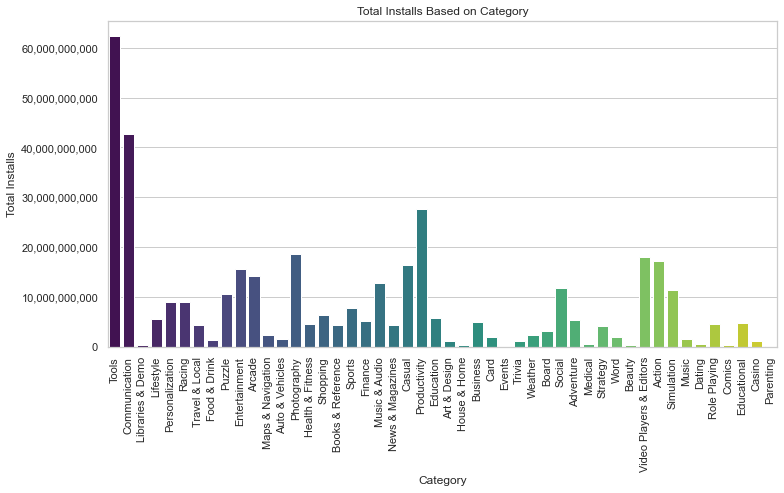

In [33]:
from matplotlib.ticker import FuncFormatter

# Assuming 'df' is your DataFrame
# Replace 'Installs' and 'Category' with your actual column names

# Convert 'Installs' to numeric
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Category', y='Installs', data=df, estimator=sum, ci=None, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Installs Based on Category')
plt.ylabel('Total Installs')
plt.xlabel('Category')

# Format y-axis labels to display as integers
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))

plt.show()


In [31]:
df['Size']

1          2.9M
3          1.8M
6          2.5M
7           16M
9          3.5M
           ... 
2312932     37M
2312933    4.1M
2312938     10M
2312942     10M
2312943    5.2M
Name: Size, Length: 1200878, dtype: object

In [36]:
df['Size'] = df['Size'].str.replace('M', '').replace('Varies with device', np.nan)
df.isna().sum()

App Name                0
App Id                  0
Category                0
Rating                  0
Rating Count            0
Installs                0
Minimum Installs        0
Maximum Installs        0
Free                    0
Price                   0
Currency                0
Size                38104
Minimum Android         0
Developer Id            0
Developer Email         0
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

In [39]:
df = df.dropna(subset=['Size'])
df.isna().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Developer Id        0
Developer Email     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
dtype: int64

In [51]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce').round(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162774 entries, 1 to 2312943
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1162774 non-null  object 
 1   App Id            1162774 non-null  object 
 2   Category          1162774 non-null  object 
 3   Rating            1162774 non-null  float64
 4   Rating Count      1162774 non-null  float64
 5   Installs          1162774 non-null  object 
 6   Minimum Installs  1162774 non-null  float64
 7   Maximum Installs  1162774 non-null  int64  
 8   Free              1162774 non-null  bool   
 9   Price             1162774 non-null  float64
 10  Currency          1162774 non-null  object 
 11  Size              1142646 non-null  float64
 12  Minimum Android   1162774 non-null  object 
 13  Developer Id      1162774 non-null  object 
 14  Developer Email   1162774 non-null  object 
 15  Released          1162774 non-null  object 
 16  

In [55]:
google['Content Rating'].value_counts()

Everyone           1081795
Teen                111570
Mature 17+           37054
Everyone 10+         22551
Unrated                125
Adults only 18+         87
Name: Content Rating, dtype: int64